# XOR neuronales Netz zu Testen
die Gewichte werden zufällig bestimmt 

In [1]:
import numpy
import math,random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Klassendefinition
class neuralNetwork:    
    # Netzwerk initialisieren
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # setze Anzahl der Knoten in den Schichten
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.trainingslaeufe=0 #zu Zählen der Durchläufe
        self.fehlerzahl=0
        self.trainingsAuswertung=[]
        # Gewichtsmatrizen, wih and who       
        self.wih = numpy.random.normal(0.0, pow(20, -0.5), (self.hnodes, self.inodes))        
        self.who = numpy.random.normal(0.0, pow(20, -0.5), (self.onodes, self.hnodes))
        print("whi",self.wih)
        print("who",self.who)
        # Lernrate
        self.lr = learningrate
        
        
    def activation_function(self,y_array):
        lx=len(y_array)  
        ly=len(y_array[0])
        aus=[]
        for i in range(lx):
            zeile=[]
            for j in range(ly):
                zeile.append(1/(1+math.exp(-y_array[i][j])))
            aus.append(zeile)
        aus=numpy.array(aus)
        return aus
    
    # train the neural network
    def train(self, inputs_list, targets_list):        
        self.trainingslaeufe+=1
        # wandelt Eingabeliste in ein 2d Array um
        inputs = numpy.array(inputs_list, ndmin=2).T       
        targets = numpy.array(targets_list, ndmin=2).T        
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        #print("HiddenInputs: \n",hidden_inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        #print("Hidden Outputs: \n",hidden_outputs)
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #print("FinalInputs: \n",final_inputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        #print("FINAL OUT: \n",final_outputs,"\nTargets:\n",targets)
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        if abs(output_errors[0])>0.49:
            self.fehlerzahl+=1
        if self.trainingslaeufe%100==0:
            self.trainingsAuswertung.append(self.fehlerzahl/100)
            self.fehlerzahl=0
        #print("Out_Errors:\n",output_errors)
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        #print("Hidden_Errors:\n",hidden_errors)
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        #print("Gewichte nach Runde:",self.trainingslaeufe,"\n",self.wih,"\n",self.who)
        pass

    
    # Testfunktion fuer das Netzwerk
    def query(self, inputs_list):        
        inputs = numpy.array(inputs_list, ndmin=2).T        
        hidden_inputs = numpy.dot(self.wih, inputs)        
        hidden_outputs = self.activation_function(hidden_inputs)      
        final_inputs = numpy.dot(self.who, hidden_outputs)        
        final_outputs = self.activation_function(final_inputs)        
        return final_outputs
    
    def test(self,eingabe):        
        aus=self.query(eingabe)
        print(aus)
        text="Eingaben: "
        for e in eingabe:
            text+=str(e)
            text+=", "
        #print(text)
        austext="  Ausgaben: "
        for a in aus:
            austext+=str(a[0])
            austext+=", "
        print(text+austext)

whi [[ 0.04847665  0.12894352]
 [-0.07819172  0.43442791]
 [ 0.3881606   0.14077731]
 [-0.21554862 -0.27181599]
 [-0.06546474 -0.10627882]]
who [[-0.00679332 -0.20216997 -0.13888269  0.06580141  0.37744388]
 [ 0.00551334 -0.36945893  0.1088869   0.12185905  0.08930473]]
[[0.03471563]
 [0.96526481]]
Eingaben: 0.01, 0.01,   Ausgaben: 0.034715633514138186, 0.965264812915981, 
[[0.97194343]
 [0.02807987]]
Eingaben: 0.01, 0.99,   Ausgaben: 0.9719434294629214, 0.028079865525602415, 
[[0.97174505]
 [0.02827156]]
Eingaben: 0.99, 0.01,   Ausgaben: 0.971745051507542, 0.028271561955275797, 
[[0.01817994]
 [0.98178042]]
Eingaben: 0.99, 0.99,   Ausgaben: 0.018179944039368845, 0.9817804169153651, 
Anzahl der Trainingsläufe  40000
Gewichte am Ende
[[ -5.66533919  13.20223188]
 [-14.82545884   5.80231146]
 [  5.66337687 -13.19582197]
 [ -5.68525952  -5.67554644]
 [-11.88335448   5.42987958]]
[[ -3.99903495   4.55802697   3.61728483 -14.10275851   3.06701371]
 [  3.99607808  -5.02971626  -3.6166356   1

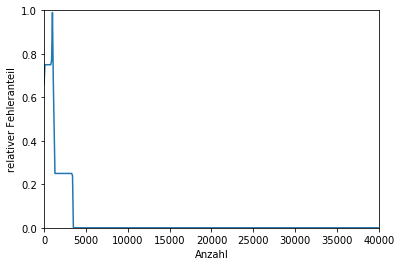

In [3]:
# Anzahl der Knoten in den Schichten
input_nodes = 2
hidden_nodes = 5
output_nodes = 2
learning_rate = 0.5

# Netzwerk aufbauen
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
anzLaeufe=10000
trainingsDaten=[[0.99,0.01,0.99,0.01],\
                [0.01,0.99,0.99,0.01],\
                [0.01,0.01,0.01,0.99],\
                [0.99,0.99,0.01,0.99]]*anzLaeufe

for liste in trainingsDaten:
    inListe=numpy.array(liste[:2])
    tarListe=numpy.array(liste[-2:])    
    n.train(inListe,tarListe) #Training 

   
# Testen des Netzes
n.test([0.01,0.01])
n.test([0.01,0.99])
n.test([0.99,0.01])
n.test([0.99,0.99])
print("Anzahl der Trainingsläufe ",n.trainingslaeufe)
print("Gewichte am Ende")
print(n.wih)
print(n.who)

 #Anzeige der Trainingsauswertung
anzahl=list(range(0,anzLaeufe*4,100))
plt.plot(anzahl, n.trainingsAuswertung)
plt.xlabel('Anzahl')
plt.ylabel('relativer Fehleranteil')
plt.axis([0, anzLaeufe*4, 0, 1])
plt.show()
